In [ ]:
!pip install seaborn
!pip install matplotlib

# Imports


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
# Pour la représentation 3D, on peut utiliser 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from pandas.plotting import boxplot
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# Mount Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cd /content/drive/My\ Drive/Colab\ Notebooks/PIP

/content/drive/My Drive/Colab Notebooks/PIP


# Load data

In [ ]:
# dataset = pd.read_csv("Dataset_complete.csv")
# col = dataset.columns[15:]
# col
# data = dataset[col]
# data.head()
# data.info()

In [ ]:
# #dataset = pd.read_csv("Dataset_complete.csv")
# dataset = pd.read_csv("data_v2.csv")
# data_validation = dataset[dataset.target==184]
# data = dataset[dataset.target!=184]


# col = ["nlos_indicator","t1","t2","t3","t4","skew","tof","tof_skew","range","range_skew","loc_target_x","loc_target_y","loc_target_z","temperature_initiator","temperature_target","rssi_request","rssi_ack","rssi_data","rssi_mean","orientation","loc_initiator_x","loc_initiator_y"]

# data = data[col]
# data_validation = data_validation[col]


# y_validation = data_validation[['loc_initiator_x', 'loc_initiator_y']]
# x_validation = data_validation.drop(['loc_initiator_x', 'loc_initiator_y'], axis=1)


# y = data[['loc_initiator_x', 'loc_initiator_y']]
# X = data.drop(['loc_initiator_x', 'loc_initiator_y'], axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)




In [23]:
train = pd.read_csv("train_v2.csv")
test = pd.read_csv("test_v2.csv")
validation = pd.read_csv("validation_v2.csv")

y_train = train[['loc_initiator_x', 'loc_initiator_y']]
x_train = train.drop(['loc_initiator_x', 'loc_initiator_y'], axis=1)

y_test = test[['loc_initiator_x', 'loc_initiator_y']]
x_test = test.drop(['loc_initiator_x', 'loc_initiator_y'], axis=1)

y_validation = validation[['loc_initiator_x', 'loc_initiator_y']]
x_validation = validation.drop(['loc_initiator_x', 'loc_initiator_y'], axis=1)




# analyses descriptives

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc447056310>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc4470569d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc44704bf70>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc44705e0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc44705e3d0>],
 'means': []}

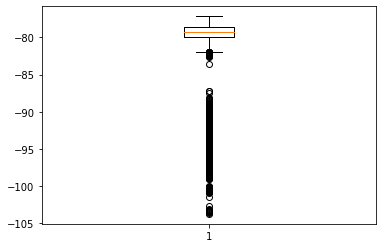

In [ ]:
#plt.boxplot(data["rssi_request", "rssi_ack","rssi_data","rssi_mean"])
#sns.catplot(data=data, x='day', y='total_bill', hue="smoker", kind='box', legend=False)
plt.boxplot(data["rssi_request"])

In [ ]:
mat = data.corr()
#print(mat)
sns.heatmap(mat)

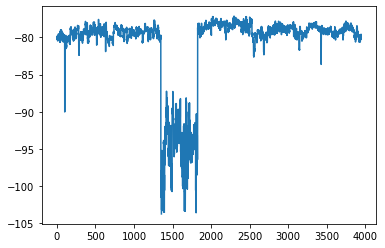

In [ ]:
plt.plot(data['rssi_request'])

In [ ]:
data.describe()

,loc_initiator_x,loc_initiator_y,loc_initiator_z,loc_target_x,loc_target_y,loc_target_z,distance,course_dist,temperature_initiator,temperature_target,timestamp,seqnum,rssi_request,rssi_ack,rssi_data,rssi_mean
count,3946.000000,3946.000000,3.946000e+03,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3.946000e+03,3946.00000,3946.000000,3946.000000,3946.000000,3946.000000
mean,0.365008,5.955793,2.650000e+00,1.452085,5.878422,2.651427,5.312293,3.617079,39.577380,39.555326,1.654930e+12,2200.96072,-inf,-inf,-inf,-inf
std,0.983370,1.772241,4.441455e-16,5.091560,2.249992,0.003063,2.936111,2.026785,2.341864,3.782210,3.017928e+05,1216.14462,NaN,NaN,NaN,NaN
min,-1.276000,2.793000,2.650000e+00,-3.962000,2.793000,2.650000,0.000000,0.000000,30.410000,27.559999,1.654930e+12,1.00000,-inf,-inf,-inf,-inf
25%,-0.500000,4.454000,2.650000e+00,-3.132000,4.339000,2.650000,3.323000,1.899738,38.959999,36.680000,1.654930e+12,1174.25000,-79.967224,-79.988684,-79.884079,-79.886862
50%,0.325000,6.028000,2.650000e+00,-1.190000,4.578000,2.650000,4.639000,3.699628,40.384998,39.340000,1.654930e+12,2231.50000,-79.230034,-79.305238,-79.218111,-79.237715
75%,1.198000,7.514000,2.650000e+00,6.169000,7.931000,2.650000,6.312000,5.399282,41.240002,42.380001,1.654931e+12,3251.75000,-78.659598,-78.701023,-78.666953,-78.686799
max,2.120000,8.914000,2.650000e+00,11.442000,9.249000,2.658000,12.722000,6.999961,42.380001,47.320004,1.654931e+12,4260.00000,-77.162437,-77.516188,-77.428716,-77.478065


In [ ]:
plt.plot(data['distance'])

In [ ]:
#sns.pairplot(data, hue="species", height=2.5)

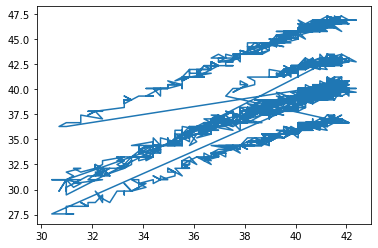

In [ ]:
plt.plot(data["temperature_initiator"], data["temperature_target"])

# Functions

In [35]:
def score_distanceM(Xobserve,Yobserve,Xprevu,Yprevu):
  X=(Xobserve-Xprevu)**2
  Y=(Yobserve-Yprevu)**2
  return np.mean(np.sqrt(X+Y))

# Machine learning

## linear regression which predicts one value

### train and test

mean absolute error of coord x :  3.0537009380794706
mean absolute error of coord y :  5.50317939503918


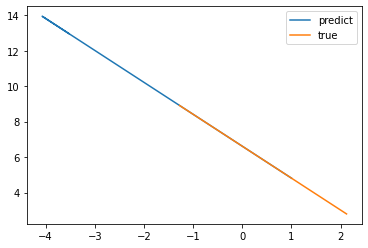

In [25]:
reg_lin_x = LinearRegression()
reg_lin_x.fit(x_train,y_train.loc_initiator_x)
y_pred_x = reg_lin_x.predict(x_test)


reg_lin_y = LinearRegression()
reg_lin_y.fit(x_train,y_train.loc_initiator_y)
y_pred_y = reg_lin_y.predict(x_test)

print('mean absolute error of coord x : ', mean_absolute_error(y_test.loc_initiator_x, y_pred_x))
print('mean absolute error of coord y : ', mean_absolute_error(y_test.loc_initiator_y, y_pred_y))

plt.plot(y_pred_x, y_pred_y, label='predict')
plt.plot(y_test.loc_initiator_x, y_test.loc_initiator_y, label='true')
plt.legend()

### validation

mean absolute error of coord x :  0.37083924335001556
mean absolute error of coord y :  0.6683244863600116


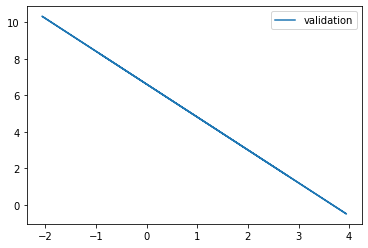

In [26]:
val_pred_x = reg_lin_x.predict(x_validation)
val_pred_y = reg_lin_y.predict(x_validation)

print('mean absolute error of coord x : ', mean_absolute_error(y_validation.loc_initiator_x, val_pred_x))
print('mean absolute error of coord y : ', mean_absolute_error(y_validation.loc_initiator_y, val_pred_y))

plt.plot(val_pred_x, val_pred_y, label='validation')
#plt.plot(y_test.loc_initiator_x, y_test.loc_initiator_y, label='true')
plt.legend()


## Linear regression with 2 values predicted

### train and test

In [45]:

reg_lin_2var = LinearRegression()
reg_lin_2var.fit(x_train,y_train)
y_pred_2var = reg_lin_2var.predict(x_test)

print('mean absolute error : ', mean_absolute_error(y_test, y_pred_2var))
print('mean squared error : ', mean_squared_error(y_test, y_pred_2var, squared=False))
print('score distance : ', score_distanceM(y_test.loc_initiator_x,y_test.loc_initiator_y,y_pred_2var[:,0],y_pred_2var[:,1]))


mean absolute error :  4.278449015053161
mean squared error :  4.332400300889977
score distance :  6.293663851386959


### validation

In [48]:
val_pred_2var = reg_lin_2var.predict(x_validation)

print('mean absolute error : ', mean_absolute_error(y_validation, val_pred_2var))
print('mean squared error : ', mean_squared_error(y_validation, val_pred_2var, squared=False))
print('score distance : ', score_distanceM(y_validation.loc_initiator_x,y_validation.loc_initiator_y,val_pred_2var[:,0],val_pred_2var[:,1]))

mean absolute error :  0.5195845549379021
mean squared error :  0.6451979101190723
score distance :  0.7643199082829752


## Decision Tree Regressor

### train and test

In [49]:
# reg_DTR_x = DecisionTreeRegressor()
# reg_DTR_x.fit(x_train,y_train.loc_initiator_x)
# y_pred_x = reg_DTR_x.predict(x_test)


# reg_DTR_y = DecisionTreeRegressor()
# reg_DTR_y.fit(x_train,y_train.loc_initiator_y)
# y_pred_y = reg_DTR_y.predict(x_test)

# print('mean absolute error of coord x : ', mean_absolute_error(y_test.loc_initiator_x, y_pred_x))
# print('mean absolute error of coord y : ', mean_absolute_error(y_test.loc_initiator_y, y_pred_y))

# plt.plot(y_pred_x, y_pred_y, label='predict')
# plt.plot(y_test.loc_initiator_x, y_test.loc_initiator_y, label='true')
# plt.legend()

reg_DTR = DecisionTreeRegressor()
reg_DTR.fit(x_train,y_train)
y_pred = reg_DTR.predict(x_test)


print('mean absolute error : ', mean_absolute_error(y_test, y_pred))
print('mean squared error : ', mean_squared_error(y_test, y_pred, squared=False))
print('score distance : ', score_distanceM(y_test.loc_initiator_x,y_test.loc_initiator_y,y_pred[:,0],y_pred[:,1]))



mean absolute error :  0.35338526912181334
mean squared error :  0.5345108848136931
score distance :  0.5198354307920411


### validation

In [50]:
# val_pred_x = reg_DTR_x.predict(x_validation)
# val_pred_y = reg_DTR_y.predict(x_validation)

# print('mean absolute error of coord x : ', mean_absolute_error(y_validation.loc_initiator_x, val_pred_x))
# print('mean absolute error of coord y : ', mean_absolute_error(y_validation.loc_initiator_y, val_pred_y))

# plt.plot(val_pred_x, val_pred_y, label='validation')
# #plt.plot(y_test.loc_initiator_x, y_test.loc_initiator_y, label='true')
# plt.legend()

val_pred_2var = reg_DTR.predict(x_validation)

print('mean absolute error : ', mean_absolute_error(y_validation, val_pred_2var))
print('mean squared error : ', mean_squared_error(y_validation, val_pred_2var, squared=False))
print('score distance : ', score_distanceM(y_validation.loc_initiator_x,y_validation.loc_initiator_y,val_pred_2var[:,0],val_pred_2var[:,1]))



mean absolute error :  0.1863691997310029
mean squared error :  0.2797736159673357
score distance :  0.27415003828168416


## Random Forest Regressor

### train and test

In [51]:
# reg_RFR_x = RandomForestRegressor()
# reg_RFR_x.fit(x_train,y_train.loc_initiator_x)
# y_pred_x = reg_RFR_x.predict(x_test)


# reg_RFR_y = RandomForestRegressor()
# reg_RFR_y.fit(x_train,y_train.loc_initiator_y)
# y_pred_y = reg_RFR_y.predict(x_test)

# print('mean absolute error of coord x : ', mean_absolute_error(y_test.loc_initiator_x, y_pred_x))
# print('mean absolute error of coord y : ', mean_absolute_error(y_test.loc_initiator_y, y_pred_y))

# plt.plot(y_pred_x, y_pred_y, label='predict')
# plt.plot(y_test.loc_initiator_x, y_test.loc_initiator_y, label='true')
# plt.legend()

reg_RFR = RandomForestRegressor()
reg_RFR.fit(x_train,y_train)
y_pred = reg_RFR.predict(x_test)


print('mean absolute error : ', mean_absolute_error(y_test, y_pred))
print('mean squared error : ', mean_squared_error(y_test, y_pred, squared=False))
print('score distance : ', score_distanceM(y_test.loc_initiator_x,y_test.loc_initiator_y,y_pred[:,0],y_pred[:,1]))




mean absolute error :  0.2595279745042493
mean squared error :  0.3944396228831063
score distance :  0.3817767278569027


### validation

In [52]:
# val_pred_x = reg_RFR_x.predict(x_validation)
# val_pred_y = reg_RFR_y.predict(x_validation)

# print('mean absolute error of coord x : ', mean_absolute_error(y_validation.loc_initiator_x, val_pred_x))
# print('mean absolute error of coord y : ', mean_absolute_error(y_validation.loc_initiator_y, val_pred_y))

# plt.plot(val_pred_x, val_pred_y, label='validation')
# #plt.plot(y_test.loc_initiator_x, y_test.loc_initiator_y, label='true')
# plt.legend()


val_pred_2var = reg_RFR.predict(x_validation)

print('mean absolute error : ', mean_absolute_error(y_validation, val_pred_2var))
print('mean squared error : ', mean_squared_error(y_validation, val_pred_2var, squared=False))
print('score distance : ', score_distanceM(y_validation.loc_initiator_x,y_validation.loc_initiator_y,val_pred_2var[:,0],val_pred_2var[:,1]))



mean absolute error :  0.13806360121049094
mean squared error :  0.20551307155052245
score distance :  0.2030915204605186


## Nouvel DF

In [ ]:
# data = pd.read_csv("newData.csv")
# data = data.drop(['Unnamed: 0', 'target', 'timestamp', 'seqnum', 'loc_target_z','repaire'], axis=1)
# #data[data['repaire']==0]
# data = data.iloc[0:3946,]
# data




# #data['orientation'] = df['orientation']
# data.columns

# col = ['nlos_indicator', 't1', 't2', 't3', 't4', 'skew', 'tof', 'tof_skew', 'loc_initiator_x', 'loc_initiator_y', 'loc_target_x', 'loc_target_y', 'rssi_request', 'rssi_ack', 'rssi_data', 'rssi_mean']
# data = data[col]


# dico = {}
# val = 1
# for k in data['loc_initiator_x'].unique():

#   dico[k] = val
#   val = val + 1

# #print(dico)

# liste=[]

# for i in range(data.shape[0]):

#   liste.append(dico[data['loc_initiator_x'].iloc[i]])


# # print(len(liste))
# # print(liste)
# data['class'] = liste



# for i in data.columns :
#   data[i].replace([-np.inf], data[i].median(), inplace=True)
# #print(data.describe())

# print(data.shape)
# data.dropna(inplace=True)
# print(data.shape)



# y = data[['loc_initiator_x', 'loc_initiator_y', 'class']]
# X = data.drop(['loc_initiator_x', 'loc_initiator_y'], axis=1)


# y_ = y['class']
# y_ = y_.astype('category')



# X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.4, random_state=42)



# clf = DecisionTreeClassifier()
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# np.mean(y_pred!=y_test)*100

# print(np.isnan(X_train.any())) #and gets False
# print(np.isfinite(X_train.all()) )#and gets True
# # X_train.info()


# sfs = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
#                                 direction='forward',
#                                 scoring='accuracy').fit(X_train, y_train)


# sfs_back = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
#                                 direction='backward',
#                                 scoring='accuracy').fit(X_train, y_train)

# #forward
# sfs.support_
# X_train.columns[sfs.support_]


# #backward
# sfs_back.support_
# X_train.columns[sfs_back.support_]


# col = []
# X_train = X_train[col]
# X_test = X_test[col]
# y_train = y_train[col]
# y_test = y_test[col]



# clf = DecisionTreeClassifier()
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# np.mean(y_pred!=y_test)*100


